In [50]:
import re
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
from sklearn import svm
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import RidgeClassifier

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.decomposition import PCA
from sklearn.metrics import plot_confusion_matrix

from sklearn.neighbors import NearestCentroid

from sklearn.linear_model import PassiveAggressiveClassifier


In [2]:
raw_data = pd.read_csv("crimenewsdataset5303.csv", sep=",")

raw_data.head()
# check the size of the data and its class distribution
sentences = raw_data['headline'].tolist()
kEYWORD = raw_data['Category'].tolist()


# Let's see how many categories we have here
print(f"Total unique categories are: {len(raw_data['Category'].value_counts())}")
print(f"Count of occurance of each kEYWORD:")
raw_data['Category'].value_counts()


Total unique categories are: 5
Count of occurance of each kEYWORD:


قتل وغارت        1930
ظُلم و زیادتی    1585
غیر متعلق         921
چوری              730
نشہ آور اشیاء     136
Name: Category, dtype: int64

c:\python39\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 1729 (\N{ARABIC LETTER HEH GOAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\python39\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Matplotlib currently does not support Arabic natively.
  fig.canvas.print_figure(bytes_io, **kw)


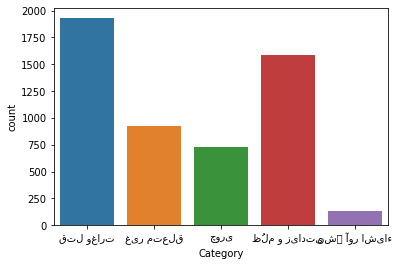

In [3]:
sns.countplot(x='Category', data=raw_data)
plt.show()

In [4]:
# text cleaning and pre-processing:
def delete_urdu_english_symbols(sentences):
    cleaned = []
    for sentence in sentences:
        # Remove English and Urdu punctuations
        text = re.sub(r"""[!"#$%&'()*+,-./:;<=>?@[]^_`{|}~؛؟’‘٭ء،۔]+""", " ", sentence)
        # remove multiple spaces.
        text = re.sub(r" +", " ", text)
        text = text.split(" ")
        # some stupid empty tokens should be removed.
        text = [t.strip() for t in text if t.strip()]
        cleaned.append(" ".join(text))
    return cleaned


X = delete_urdu_english_symbols(sentences)
Y = kEYWORD

# print(X);
# print(Y);

In [23]:
# Feel free to use different ratios to split the data.
train_text, test_text, train_labels, test_labels = train_test_split(X, Y, test_size=0.20, random_state=42)

# training: tf-idf + logistic regression
max_feature_num = 10000
train_vectorizer = TfidfVectorizer(max_features=max_feature_num)
train_vecs = train_vectorizer.fit_transform(train_text)

# X_test1 = [
#  'ملازمہ کےمبینہ قتل ہولناک واردات',
#  'مستی گیٹ : دکان کاؤنٹر سے موبائل فون چوری فوٹیج سٹی42 نے حاصل کر',
#  'ایف آئی اے بڑی کارروائی ، پاکستانی طلبا سے فراڈ کرنے ملزم گرفتار',
#  'تھانیدار جنسی درندہ بن گیا ، خاتون کو مبینہ زیادتی کا نشانہ بنا ڈالا',
#  'پولیس کا منشیات فروشوں کیخلاف کریک ڈاؤن ، 2 ملزم گرفتار',
#  'ڈاکوؤں نے چینی باشندوں کو بھی نہ بخشا۔۔۔نقدی لوٹ کرفرار',
#  'سمن آباد میں ہوائی فائرنگ کرنے 4 ملزم گرفتار ، اسلحہ برآمد',
#  'کسٹمز حکام نے لندن ہیروئن سمگل کرنیکی کوشش ناکام بنا',
#  'امریکہ میں رہائشی کمپلیکس میں فائرنگ، حملہ آور ہلاک',
#  'نیم برہنہ حالت میں ملی لڑکی کی لاش، ریپ کے بعد کیا گیا نابالغہ کا قتل',]

# test_vecs = TfidfVectorizer(max_features=max_feature_num, vocabulary=train_vectorizer.vocabulary_).fit_transform(
#     X_test1)

test_vecs = TfidfVectorizer(max_features=max_feature_num, vocabulary=train_vectorizer.vocabulary_).fit_transform(
    test_text)


In [ ]:
>> X, y = make_classification(random_state=0)
>>> X_train, X_test, y_train, y_test = train_test_split(
...         X, y, random_state=0)
>>> clf = SVC(random_state=0)
>>> clf.fit(X_train, y_train)
SVC(random_state=0)
>>> plot_confusion_matrix(clf, X_test, y_test)  
>>> plt.show()

In [36]:
# train model
clf = svm.LinearSVC(max_iter=5000)
clf.fit(train_vecs, train_labels)

# test_pred = clf.predict(test_vecs)
# acc = accuracy_score(test_labels, test_pred)
# pre, rec, f1, _ = precision_recall_fscore_support(test_labels, test_pred, average='weighted')
# print('acc', acc)
# print('precision', pre)
# print('rec', rec)
# print('f1', f1)

# plot_confusion_matrix(clf, train_vecs, train_labels)  
# plt.show()

LinearSVC(max_iter=5000)

In [31]:
قتل وغارت        1930
ظُلم و زیادتی    1585
غیر متعلق         921
چوری              730
نشہ آور اشیاء     136


clf_tfidf_lsvc = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', svm.LinearSVC(max_iter=5000))])
clf_tfidf_lsvc.fit(train_text, train_labels)
# Form a prediction set
predictions = clf_tfidf_lsvc.predict(test_text)
# Print the overall accuracy
print(metrics.accuracy_score(test_labels,predictions))

0.8548539114043355


0.705937794533459


c:\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
c:\python39\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 1729 (\N{ARABIC LETTER HEH GOAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\python39\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Matplotlib currently does not support Arabic natively.
  fig.canvas.print_figure(bytes_io, **kw)


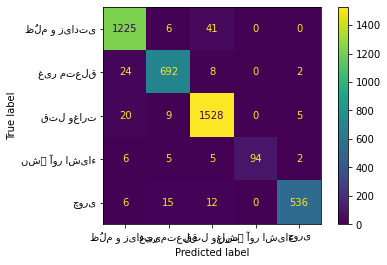

In [41]:
clf_tfidf_mnb = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', MultinomialNB())])

# Feed the training data through the pipeline
clf_tfidf_mnb.fit(train_text, train_labels) 

# Form a prediction set
predictions = clf_tfidf_mnb.predict(test_text)
# Print the overall accuracy
print(metrics.accuracy_score(test_labels,predictions))

plot_confusion_matrix(clf, train_vecs, train_labels)  
plt.show()

In [18]:
# clf_tfidf_gnb = Pipeline([('tfidf', TfidfVectorizer()),
#                      ('clf', GaussianNB())])

# # Feed the training data through the pipeline
# clf_tfidf_gnb.fit(train_text, train_labels) 

# # Form a prediction set
# predictions = clf_tfidf_gnb.predict(test_text)
# # Print the overall accuracy
# print(metrics.accuracy_score(test_labels,predictions))


In [33]:
clf_tfidf_lr = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LogisticRegression())])

# Feed the training data through the pipeline
clf_tfidf_lr.fit(train_text, train_labels) 

predictions = clf_tfidf_lr.predict(test_text)
# Print the overall accuracy
print(metrics.accuracy_score(test_labels,predictions))

0.8407163053722903


In [34]:
clf_tfidf_knc = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', KNeighborsClassifier())])

# Feed the training data through the pipeline
clf_tfidf_knc.fit(train_text, train_labels)

predictions = clf_tfidf_knc.predict(test_text)
# Print the overall accuracy
print(metrics.accuracy_score(test_labels,predictions))

0.6738925541941565


In [35]:
clf_tfidf_rfc = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', RandomForestClassifier())])

# Feed the training data through the pipeline
clf_tfidf_rfc.fit(train_text, train_labels)

predictions = clf_tfidf_rfc.predict(test_text)
# Print the overall accuracy
print(metrics.accuracy_score(test_labels,predictions))

0.7832233741753063


acc 0.8454288407163054
precision 0.845440873495773
rec 0.8454288407163054
f1 0.845050976008893


c:\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
c:\python39\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 1729 (\N{ARABIC LETTER HEH GOAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\python39\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Matplotlib currently does not support Arabic natively.
  fig.canvas.print_figure(bytes_io, **kw)


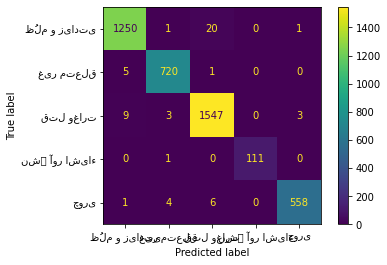

In [16]:
clf = RidgeClassifier().fit(train_vecs, train_labels)
test_pred = clf.predict(test_vecs)
acc = accuracy_score(test_labels, test_pred)
pre, rec, f1, _ = precision_recall_fscore_support(test_labels, test_pred, average='weighted')
print('acc', acc)
print('precision', pre)
print('rec', rec)
print('f1', f1)

plot_confusion_matrix(clf, train_vecs, train_labels)  
plt.show()

In [37]:
# predictions = clf.predict(test_vecs)
# print(predictions)
# for i, x in enumerate(clf.predict(test_vecs)):
#   print(i, x)
predictkeys = []
predictvalues = []

news_dict = dict(zip(X_test1, clf.predict(test_vecs)))
for key, value in news_dict.items():
    predictkeys.append(key)
    predictvalues.append(value)
    print(key)
    print( value +' :Predicted as - ' )
    print('\n')
    
    
# print(predictkeys, predictvalues)

ملازمہ کےمبینہ قتل ہولناک واردات
قتل وغارت :Predicted as - 


مستی گیٹ : دکان کاؤنٹر سے موبائل فون چوری فوٹیج سٹی42 نے حاصل کر
چوری :Predicted as - 


ایف آئی اے بڑی کارروائی ، پاکستانی طلبا سے فراڈ کرنے ملزم گرفتار
غیر متعلق :Predicted as - 


تھانیدار جنسی درندہ بن گیا ، خاتون کو مبینہ زیادتی کا نشانہ بنا ڈالا
ظُلم و زیادتی :Predicted as - 


پولیس کا منشیات فروشوں کیخلاف کریک ڈاؤن ، 2 ملزم گرفتار
نشہ آور اشیاء :Predicted as - 


ڈاکوؤں نے چینی باشندوں کو بھی نہ بخشا۔۔۔نقدی لوٹ کرفرار
چوری :Predicted as - 


سمن آباد میں ہوائی فائرنگ کرنے 4 ملزم گرفتار ، اسلحہ برآمد
قتل وغارت :Predicted as - 


کسٹمز حکام نے لندن ہیروئن سمگل کرنیکی کوشش ناکام بنا
چوری :Predicted as - 


امریکہ میں رہائشی کمپلیکس میں فائرنگ، حملہ آور ہلاک
قتل وغارت :Predicted as - 


نیم برہنہ حالت میں ملی لڑکی کی لاش، ریپ کے بعد کیا گیا نابالغہ کا قتل
قتل وغارت :Predicted as - 




In [8]:
df = pd.DataFrame({'headline':predictkeys, 'Category':predictvalues})
print(df.shape)
df.to_csv('crimenewsdataset_l.csv', index=False)

(925, 2)


acc 0.8548539114043355
precision 0.8545655922604669
rec 0.8548539114043355
f1 0.8545720789782364


acc 0.8426013195098964
precision 0.8467313730061593
rec 0.8426013195098964
f1 0.8415593933348138


c:\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
c:\python39\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 1729 (\N{ARABIC LETTER HEH GOAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\python39\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Matplotlib currently does not support Arabic natively.
  fig.canvas.print_figure(bytes_io, **kw)


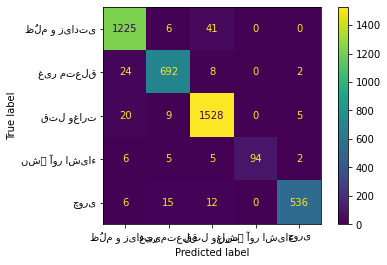

In [36]:
# train model
clf = LogisticRegression().fit(train_vecs, train_labels)


test_pred = clf.predict(test_vecs)
acc = accuracy_score(test_labels, test_pred)
pre, rec, f1, _ = precision_recall_fscore_support(test_labels, test_pred, average='weighted')
print('acc', acc)
print('precision', pre)
print('rec', rec)
print('f1', f1)

plot_confusion_matrix(clf, train_vecs, train_labels)  
plt.show()

In [9]:
# test model
test_pred = clf.predict(test_vecs)
acc = accuracy_score(test_labels, test_pred)
pre, rec, f1, _ = precision_recall_fscore_support(test_labels, test_pred, average='weighted')
print('acc', acc)
print('precision', pre)
print('rec', rec)
print('f1', f1)

ValueError: Found input variables with inconsistent numbers of samples: [1061, 926]

In [25]:
# train model
clf = RandomForestClassifier()
clf.fit(train_vecs, train_labels)

RandomForestClassifier()

acc 0.7841658812441094
precision 0.7883559373177383
rec 0.7841658812441094
f1 0.7826916277623276


c:\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
c:\python39\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 1729 (\N{ARABIC LETTER HEH GOAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\python39\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Matplotlib currently does not support Arabic natively.
  fig.canvas.print_figure(bytes_io, **kw)


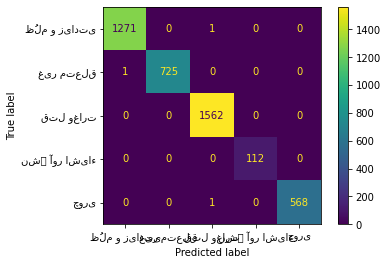

In [26]:
# test model
test_pred = clf.predict(test_vecs)
acc = accuracy_score(test_labels, test_pred)
pre, rec, f1, _ = precision_recall_fscore_support(test_labels, test_pred, average='weighted')
print('acc', acc)
print('precision', pre)
print('rec', rec)
print('f1', f1)

plot_confusion_matrix(clf, train_vecs, train_labels)  
plt.show()

In [49]:
# train model
clf = NearestCentroid()
clf.fit(train_vecs, train_labels)

# test model
test_pred = clf.predict(test_vecs)
acc = accuracy_score(test_labels, test_pred)
pre, rec, f1, _ = precision_recall_fscore_support(test_labels, test_pred, average='weighted')
print('acc', acc)
print('precision', pre)
print('rec', rec)
print('f1', f1)


acc 0.7700282752120641
precision 0.8014397516346035
rec 0.7700282752120641
f1 0.776284169315947


In [53]:
# train model
clf =  PassiveAggressiveClassifier()
clf.fit(train_vecs, train_labels)

# test model
test_pred = clf.predict(test_vecs)
acc = accuracy_score(test_labels, test_pred)
pre, rec, f1, _ = precision_recall_fscore_support(test_labels, test_pred, average='weighted')
print('acc', acc)
print('precision', pre)
print('rec', rec)
print('f1', f1)

acc 0.8454288407163054
precision 0.844703305025356
rec 0.8454288407163054
f1 0.8448299850072926


In [42]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(train_vecs, train_labels)
test_pred = neigh.predict(test_vecs)
acc = accuracy_score(test_labels, test_pred)
pre, rec, f1, _ = precision_recall_fscore_support(test_labels, test_pred, average='weighted')
print('acc', acc)
print('precision', pre)
print('rec', rec)
print('f1', f1)

plot_confusion_matrix(clf, train_vecs, train_labels)  
plt.show()

KNeighborsClassifier(n_neighbors=3)

acc 0.6606974552309143
precision 0.6596612603147697
rec 0.6606974552309143
f1 0.6547025997145985


c:\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
c:\python39\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 1729 (\N{ARABIC LETTER HEH GOAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\python39\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Matplotlib currently does not support Arabic natively.
  fig.canvas.print_figure(bytes_io, **kw)


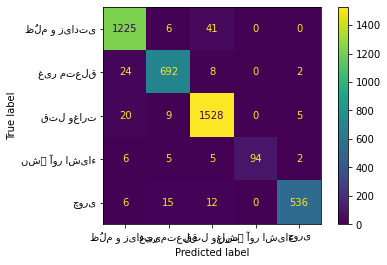

In [46]:
# train model
# X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
# Y = np.array([1, 1, 1, 2, 2, 2])
# test_pred = neigh.predict(test_vecs)
acc = accuracy_score(test_labels, test_pred)
pre, rec, f1, _ = precision_recall_fscore_support(test_labels, test_pred, average='weighted')
print('acc', acc)
print('precision', pre)
print('rec', rec)
print('f1', f1)

plot_confusion_matrix(clf, train_vecs, train_labels)  
plt.show()

In [ ]:
# test model
test_pred = clf.predict(test_vecs)
acc = accuracy_score(test_labels, test_pred)
pre, rec, f1, _ = precision_recall_fscore_support(test_labels, test_pred, average='weighted')
print('acc', acc)
print('precision', pre)
print('rec', rec)
print('f1', f1)

In [ ]:
# test model

clf_pf = GaussianNB()
clf_pf.partial_fit(train_vecs, train_labels)

test_pred = clf_pf.predict(test_vecs)
acc = accuracy_score(test_labels, test_pred)
pre, rec, f1, _ = precision_recall_fscore_support(test_labels, test_pred, average='weighted')
print('acc', acc)
print('precision', pre)
print('rec', rec)
print('f1', f1)